In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [2]:
#loading the dataset

(X_train, Y_train), (X_test , Y_test) =mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
#naming all the class

classes = ['zero','one','two','three','four','five','six','seven','eight','nine']

In [5]:
classes[Y_train[6]]

'one'

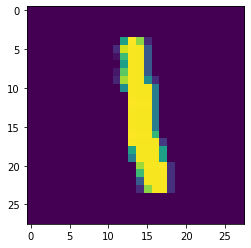

In [6]:
#visualising the data

plt.imshow(X_train[6])
#np.argmax(Y_train[4])

In [7]:
#normalising the data

X_train, X_test = X_train / 255.0 , X_test / 255.0

#converting to categorical data

Y_train , Y_test = to_categorical(Y_train) , to_categorical(Y_test)

In [8]:
X_train =X_train.reshape(60000, 28, 28,1)

In [9]:
model = Sequential()

#conv1
model.add(Conv2D(32 , (3,3) , activation= 'relu', kernel_initializer='he_uniform' ))
model.add(MaxPool2D((2,2)))

#conv2
model.add(Conv2D(64 , (3,3) , activation= 'relu', kernel_initializer='he_uniform' ))
model.add(MaxPool2D((2,2)))

#conv3
model.add(Conv2D(128 , (3,3) , activation= 'relu', kernel_initializer='he_uniform' ))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

#Drafting ANN Model
model.add(Dense(200 , activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(100 , activation= 'tanh'))
model.add(Dropout(0.2))

model.add(Dense(50 , activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(25 , activation= 'tanh'))
model.add(Dropout(0.2))

model.add(Dense(10 , activation = 'softmax'))


In [10]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.fit(X_train , Y_train , epochs = 30 , batch_size = 30)

Epoch 1/30
2000/2000 [==============================] - 9s 3ms/step - loss: 0.6929 - accuracy: 0.7820
Epoch 2/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1339 - accuracy: 0.9682
Epoch 3/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0927 - accuracy: 0.9790
Epoch 4/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0794 - accuracy: 0.9805
Epoch 5/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0649 - accuracy: 0.9844
Epoch 6/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0625 - accuracy: 0.9857
Epoch 7/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0546 - accuracy: 0.9876
Epoch 8/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0459 - accuracy: 0.9892
Epoch 9/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0497 - accuracy: 0.9890
Epoch 10/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.042

In [13]:
Y_train.shape

(60000, 10)

In [15]:
Y_train =Y_train.reshape(60000, 10,1)

In [16]:
X_test.shape

(10000, 28, 28)

In [17]:
X_test =X_test.reshape(10000, 28, 28,1)


In [25]:
#Model Evaluation

model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0681 - accuracy: 0.9878


[0.06809557229280472, 0.9878000020980835]

In [18]:
Y_test.shape

(10000, 10)

In [23]:
Y_test = Y_test.reshape(10000, 10,1)

In [26]:
#Model Prediction

Y_pred = model.predict(X_test)
Y_pred

array([[8.05507716e-06, 1.57303046e-04, 2.87319504e-04, ...,
        9.98867869e-01, 2.74289177e-05, 3.19504150e-04],
       [4.30082473e-05, 3.85955318e-05, 9.99361694e-01, ...,
        2.49549514e-04, 1.07275577e-04, 3.38566351e-05],
       [5.27784687e-06, 9.99617100e-01, 9.66875596e-05, ...,
        1.01321319e-04, 7.31190376e-05, 2.12846044e-06],
       ...,
       [8.72818055e-06, 9.30464921e-06, 2.45798456e-05, ...,
        1.15882740e-05, 7.41422191e-05, 2.76608189e-04],
       [1.37668594e-05, 1.27577523e-05, 5.80218375e-06, ...,
        1.65559886e-05, 6.37108897e-05, 9.27051442e-05],
       [7.59873801e-05, 1.09690818e-05, 1.46469720e-05, ...,
        9.12581527e-06, 9.21434184e-06, 1.35701175e-05]], dtype=float32)

In [27]:
#predicted

classes[np.argmax(Y_pred[90])]

'three'

In [30]:
#visualising the prediction

#plt.imshow(X_test[90])

In [31]:
#saving the model

model.save('CNN_Model_mnist')

INFO:tensorflow:Assets written to: CNN_Model_mnist/assets
